In [2]:
import sys 
sys.path.append('..')
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
test_path = "../Datasets/PadJSRTClassification/test"
train_path = "../Datasets/PadJSRTClassification/train"
val_path = "../Datasets/PadJSRTClassification/val"

In [5]:
import os
from os import listdir

test_list = os.listdir(test_path + "/landmarks")
train_list = os.listdir(train_path + "/landmarks")
val_list = os.listdir(val_path + "/landmarks")

#only keep files with long names for the padchest dataset
test_list = [f for f in test_list if len(f) > 15]
train_list = [f for f in train_list if len(f) > 15]
val_list = [f for f in val_list if len(f) > 15]

combined_list = test_list + train_list + val_list

print(test_list)

['10155709300728342918543955138521808206_f7cj92.npy', '10383960670432673238945376919735423432_hd3moq.npy', '10996416492353037588312781035930080694_8rstz0.npy', '119688533980562249677219589534851011987_60uvre.npy', '121369866312829737404259612004787672904_od40ao.npy', '146381384591357414868726401545939282660_96eirs.npy', '229647061532869405127486256298724729451_o2d0lv.npy', '309362609894399458585188858667076734340_312chn.npy']


In [6]:
from sklearn.model_selection import train_test_split
import pathlib
import os
import torch

# Define the indices for splitting the combined landmarks
right_lung_indices = slice(76, 120)
left_lung_indices = slice(26, 76)
heart_indices = slice(0,26)

#

Pad_h = "../Datasets/landmarks/H"
Pad_ll = "../Datasets/landmarks/LL"
Pad_rl = "../Datasets/landmarks/RL"

print(len(test_list))
print(len(train_list))
print(len(val_list))

# combine Padchest lungs and hearts landmarks
for i in range(8):
    test_rl = np.load(os.path.join(Pad_rl, test_list[i]))
    test_ll = np.load(os.path.join(Pad_ll, test_list[i]))
    test_h = np.load(os.path.join(Pad_h, test_list[i]))
    test_landmarks = np.concatenate([test_rl, test_ll, test_h])
    base_name = os.path.basename(test_list[i])
    file_name, _ = os.path.splitext(base_name)

    np.save(f"../Datasets/PadJSRTClassification/padtest/{file_name}.npy", test_landmarks)

for i in range(9):
    val_rl = np.load(os.path.join(Pad_rl, val_list[i]))
    val_ll = np.load(os.path.join(Pad_ll, val_list[i]))
    val_h = np.load(os.path.join(Pad_h, val_list[i]))
    val_landmarks = np.concatenate([val_rl, val_ll,val_h ])

    base_name = os.path.basename(val_list[i])
    file_name, _ = os.path.splitext(base_name)
    np.save(f"../Datasets/PadJSRTClassification/padval/{file_name}.npy", val_landmarks)


for i in range(33):
    train_rl = np.load(os.path.join(Pad_rl, train_list[i]))
    train_ll = np.load(os.path.join(Pad_ll, train_list[i]))
    train_h = np.load(os.path.join(Pad_h, train_list[i]))
    train_landmarks = np.concatenate([train_rl, train_ll,train_h ])

    base_name = os.path.basename(train_list[i])
    file_name, _ = os.path.splitext(base_name)
    np.save(f"../Datasets/PadJSRTClassification/padtrain/{file_name}.npy", train_landmarks)


print(test_landmarks.shape)
print(train_landmarks.shape)
print(val_landmarks.shape)

# torch 
test_landmarks = torch.tensor(test_landmarks)
train_landmarks = torch.tensor(train_landmarks)
val_landmarks = torch.tensor(val_landmarks)

# save landmarks


8
33
9
(120, 2)
(120, 2)
(120, 2)


In [18]:


# test_labels = pd.read_csv("../Datasets/classificationdata/test.csv")
# train_labels = pd.read_csv("../Datasets/classificationdata/train.csv")
# val_labels = pd.read_csv("../Datasets/classificationdata/val.csv")
# # sort labels by value names
# test_labels = test_labels.sort_values(by=['File'])
# train_labels = train_labels.sort_values(by=['File'])
# val_labels = val_labels.sort_values(by=['File'])

test_labels = [1,1,1,1,1,1,1,1,0,0,0,0,0,0,0]
train_labels = []
val_labels = []
# 33 1 and 37 0
for i in range(33):
    train_labels.append(1)
for i in range(37):
    train_labels.append(0)

for i in range(9):
    val_labels.append(1)
for i in range(6):
    val_labels.append(0)

np.count_nonzero(test_labels), np.count_nonzero(train_labels), np.count_nonzero(val_labels)


(8, 33, 9)

In [19]:
import os 

import torch
from torchvision import transforms
import numpy as np

import pathlib
import re

from utils.dataLoader import LandmarksDataset, ToTensor, Rescale
from sklearn.metrics import mean_squared_error
import scipy.sparse as sp
from utils.utils import scipy_to_torch_sparse, genMatrixesLH


In [20]:
import os
from utils.dataLoader import LandmarksDataset, ToTensor, Rescale


img_path = os.path.join(train_path, 'Images')
label_path = os.path.join(train_path, 'landmarks')
train_dataset = LandmarksDataset(img_path=img_path,
                                 label_path=label_path,
                                 transform = transforms.Compose([
                                             Rescale(1024),
                                             ToTensor()])
                                 )
img_path = os.path.join(val_path, 'Images')
label_path = os.path.join(val_path, 'landmarks')
val_dataset = LandmarksDataset(img_path=img_path,
                                 label_path=label_path,
                                 transform = transforms.Compose([
                                             Rescale(1024),
                                             ToTensor()])
                                 )
img_path = os.path.join(test_path, 'Images')
label_path = os.path.join(test_path, 'landmarks')
test_dataset = LandmarksDataset(img_path=img_path,
                                 label_path=label_path,
                                 transform = transforms.Compose([
                                             Rescale(1024),
                                             ToTensor()])
                                 )


In [318]:
# def extract_landmarks(dataset):
#     landmarks = []
#     for i in range(len(dataset)):
#         if dataset[i]['landmarks'].shape[0] > 120:
#             landmarks.append(dataset[i]['landmarks'][:120])
#         else:
#             array26 = dataset[i]['landmarks'][:26]
#             array50 = dataset[i]['landmarks'][26:76]  
#             array44 = dataset[i]['landmarks'][76:] 
#             correct_order = np.concatenate([array44, array50, array26])
#             landmarks.append(torch.from_numpy(correct_order))
#     return torch.stack(landmarks)

# train_features = extract_landmarks(train_dataset)
# test_features = extract_landmarks(test_dataset)
# val_features = extract_landmarks(val_dataset)


In [21]:
print(type(train_dataset[0]['landmarks']))

<class 'torch.Tensor'>


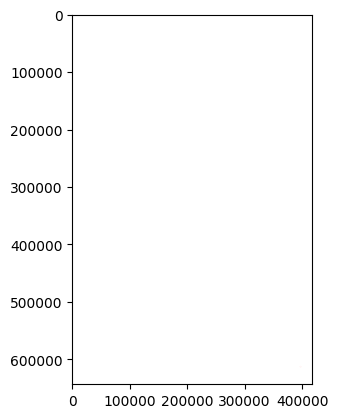

In [24]:
from utils.fun import drawOrgans

img1 = train_dataset[1]['image']
#lm = train_features[1]
lm = train_landmarks[1]

target = lm.reshape(-1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

data = torch.unsqueeze(img1, 0).to(device)
draw = data.cpu().numpy()[0,0,:,:]


ax = plt.subplot(1, 1, 1)

drawOrgans(ax, target*1024, None, draw)


In [232]:
print(train_features.shape, test_features.shape, val_features.shape)

X_train = train_features.reshape(train_features.shape[0], -1)
X_test = test_features.reshape(test_features.shape[0], -1)
X_val = val_features.reshape(val_features.shape[0], -1)
print(X_train.shape, X_test.shape, X_val.shape)

X_train_L = train_features[:,:94,:]
X_test_L = test_features[:,:94,:]
X_val_L = val_features[:,:94,:]
X_train_H = train_features[:,94:,:]
X_test_H = test_features[:,94:,:]
X_val_H = val_features[:,94:,:]

print(X_train_L.shape, X_test_L.shape, X_val_L.shape)
x_train_l = X_train_L.reshape(X_train_L.shape[0], -1)
x_train_h = X_train_H.reshape(X_train_H.shape[0], -1)
x_test_l = X_test_L.reshape(X_test_L.shape[0], -1)
x_test_h = X_test_H.reshape(X_test_H.shape[0], -1)
x_val_l = X_val_L.reshape(X_val_L.shape[0], -1)
x_val_h = X_val_H.reshape(X_val_H.shape[0], -1)

print(x_train_l.shape, x_test_l.shape, x_val_l.shape)


y_train = torch.tensor(train_labels)
y_test = torch.tensor(test_labels)
y_val = torch.tensor(val_labels)



torch.Size([70, 120, 2]) torch.Size([15, 120, 2]) torch.Size([15, 120, 2])
torch.Size([70, 240]) torch.Size([15, 240]) torch.Size([15, 240])
torch.Size([70, 94, 2]) torch.Size([15, 94, 2]) torch.Size([15, 94, 2])
torch.Size([70, 188]) torch.Size([15, 188]) torch.Size([15, 188])


In [233]:
import sklearn.svm 
from sklearn.metrics import accuracy_score
svm = sklearn.svm.SVC(kernel='linear', C=1.0) # Linear Kernel
svm.fit(X_train, y_train)


SVC(kernel='linear')

In [234]:
svm_lungs = sklearn.svm.SVC(kernel='linear', C=1.0) # Linear Kernel
svm_lungs.fit(x_train_l, y_train)

svm_hearts = sklearn.svm.SVC(kernel='linear', C=1.0) # Linear Kernel
svm_hearts.fit(x_train_h, y_train)

SVC(kernel='linear')

In [235]:
y_pred_l = svm_lungs.predict(x_test_l)
y_pred_h = svm_hearts.predict(x_test_h)

print("Accuracy lungs: ", accuracy_score(y_test, y_pred_l))
print("Accuracy hearts: ", accuracy_score(y_test, y_pred_h))

Accuracy lungs:  0.8666666666666667
Accuracy hearts:  0.5333333333333333


In [236]:
y_pred = svm.predict(X_test)

In [237]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9333333333333333


In [238]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [239]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)


Accuracy: 0.8
Cross-Validation Accuracy Scores [0.92857143 0.78571429 0.85714286 0.78571429 0.71428571]


In [240]:
# jsrt_path = "../Datasets/JSRT/Train"
# img_path = os.path.join(jsrt_path, 'Images')
# label_path = os.path.join(jsrt_path, 'landmarks')
# train_dataset = LandmarksDataset(img_path=img_path,
#                                  label_path=label_path,
#                                  transform = transforms.Compose([
#                                              Rescale(1024),
#                                              ToTensor()])
#                                  )

In [241]:
train_right_lung = X_train_L[:,:44,:]
train_left_lung = X_train_L[:,44:94:,] 
train_heart = X_train_H

test_right_lung = X_test_L[:,:44,:]
test_left_lung = X_test_L[:,44:94:,]
test_heart = X_test_H

val_right_lung = X_val_L[:,:44,:]
val_left_lung = X_val_L[:,44:94:,]
val_heart = X_val_H



In [242]:
# from utils.fun import drawOrgans
# device = torch.device('cpu')

# img1 = train_dataset[0]['image']
# lm = train_features[0]

# target = lm.reshape(-1).numpy()

# data = torch.unsqueeze(img1, 0).to(device)
# draw = data.cpu().numpy()[0,0,:,:]
# ax = plt.subplot(1, 1, 1)
# img2 = drawOrgans(ax, target*1024, None, draw)

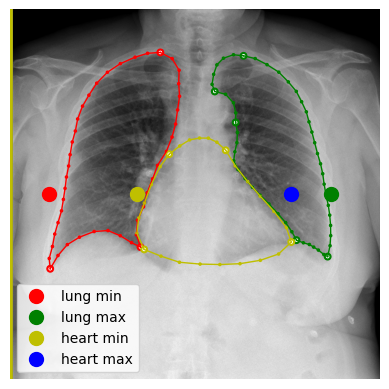

In [243]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

lung_image = train_dataset[0]['image'][0]

# Choose the index of the image you're interested in
image_index = 0

# Find min and max for the right lung, left lung, and heart of the chosen image
lung_min_x = min(torch.min(train_right_lung[image_index].view(-1)), torch.min(train_left_lung[image_index].view(-1)))
lung_max_x = max(torch.max(train_right_lung[image_index].view(-1)), torch.max(train_left_lung[image_index].view(-1)))

heart_min_x = torch.min(train_heart[image_index].view(-1))
heart_max_x = torch.max(train_heart[image_index].view(-1))

# Assuming `lung_image` is your lung image
# plt.imshow(lung_image, cmap='gray')

# Create rectangles for the min and max x-coordinates of the lungs
rect_lung_min = patches.Rectangle((lung_min_x, 0), width=1, height=lung_image.shape[0], linewidth=2, edgecolor='r', facecolor='none')
rect_lung_max = patches.Rectangle((lung_max_x, 0), width=1, height=lung_image.shape[0], linewidth=2, edgecolor='b', facecolor='none')

# Create rectangles for the min and max x-coordinates of the heart
rect_heart_min = patches.Rectangle((heart_min_x, 0), width=1, height=lung_image.shape[0], linewidth=2, edgecolor='g', facecolor='none')
rect_heart_max = patches.Rectangle((heart_max_x, 0), width=1, height=lung_image.shape[0], linewidth=2, edgecolor='y', facecolor='none')

# Add the rectangles to the plot
plt.gca().add_patch(rect_lung_min)
plt.gca().add_patch(rect_lung_max)
plt.gca().add_patch(rect_heart_min)
plt.gca().add_patch(rect_heart_max)

# Set plot limits
plt.xlim(0, lung_image.shape[1])
plt.ylim(lung_image.shape[0], 0)  # Note: y values are inverted in image coordinates

# Plot points for the min and max x-coordinates of the lungs
plt.plot(lung_min_x*1024, lung_image.shape[0] // 2, 'ro', markersize=10, label='lung min')  # red point
plt.plot(lung_max_x*1024, lung_image.shape[0] // 2, 'go', markersize=10, label='lung max')  # blue point

# Plot points for the min and max x-coordinates of the heart
plt.plot(heart_min_x*1024, lung_image.shape[0] // 2, 'yo', markersize=10, label = 'heart min')  # green point
plt.plot(heart_max_x*1024, lung_image.shape[0] // 2, 'bo', markersize=10, label='heart max')  # yellow point
plt.legend()
plt.axis('off')

# Existing code
from utils.fun import drawOrgans
device = torch.device('cpu')

img1 = train_dataset[0]['image']
lm = train_features[0]

target = lm.reshape(-1).numpy()

data = torch.unsqueeze(img1, 0).to(device)
draw = data.cpu().numpy()[0,0,:,:]
ax = plt.subplot(1, 1, 1)

img2 = drawOrgans(ax, target*1024, None, draw)
# plt.show()


In [244]:
# Assuming `right_lung`, `left_lung`, `heart` are your tensors
lung_min_x = torch.min(torch.min(train_right_lung, dim=1).values, torch.min(train_left_lung, dim=1).values)[:, 0]
lung_max_x = torch.max(torch.max(train_right_lung, dim=1).values, torch.max(train_left_lung, dim=1).values)[:, 0]

heart_min_x = torch.min(train_heart, dim=1).values[:, 0]
heart_max_x = torch.max(train_heart, dim=1).values[:, 0]

# Calculate the maximum horizontal distances
lung_distance = lung_max_x - lung_min_x
heart_distance = heart_max_x - heart_min_x

# Calculate CTR
train_CTR = heart_distance / lung_distance

lung_min_x = torch.min(torch.min(test_right_lung, dim=1).values, torch.min(test_left_lung, dim=1).values)[:, 0]
lung_max_x = torch.max(torch.max(test_right_lung, dim=1).values, torch.max(test_left_lung, dim=1).values)[:, 0]

heart_min_x = torch.min(test_heart, dim=1).values[:, 0]
heart_max_x = torch.max(test_heart, dim=1).values[:, 0]

# Calculate the maximum horizontal distances
lung_distance = lung_max_x - lung_min_x
heart_distance = heart_max_x - heart_min_x

# Calculate CTR
test_CTR = heart_distance / lung_distance


lung_min_x = torch.min(torch.min(val_right_lung, dim=1).values, torch.min(val_left_lung, dim=1).values)[:, 0]
lung_max_x = torch.max(torch.max(val_right_lung, dim=1).values, torch.max(val_left_lung, dim=1).values)[:, 0]

heart_min_x = torch.min(val_heart, dim=1).values[:, 0]
heart_max_x = torch.max(val_heart, dim=1).values[:, 0]

# Calculate the maximum horizontal distances
lung_distance = lung_max_x - lung_min_x
heart_distance = heart_max_x - heart_min_x

# Calculate CTR
val_CTR = heart_distance / lung_distance


In [245]:
print(train_CTR.shape, test_CTR.shape, val_CTR.shape)
print(train_CTR, "\n", test_CTR,"\n", val_CTR)

torch.Size([70]) torch.Size([15]) torch.Size([15])
tensor([0.5484, 0.5449, 0.5970, 0.5502, 0.5190, 0.5039, 0.5588, 0.5287, 0.5620,
        0.5903, 0.5611, 0.5052, 0.5299, 0.5314, 0.6757, 0.5141, 0.5629, 0.6209,
        0.5610, 0.5270, 0.5723, 0.5712, 0.5693, 0.5660, 0.5794, 0.5856, 0.5507,
        0.5258, 0.5088, 0.4852, 0.7187, 0.5194, 0.5494, 0.3888, 0.5778, 0.5716,
        0.6329, 0.4114, 0.4499, 0.4571, 0.5724, 0.6082, 0.4642, 0.4243, 0.4112,
        0.4415, 0.4594, 0.4745, 0.4852, 0.4448, 0.4384, 0.4252, 0.4394, 0.4973,
        0.4589, 0.4533, 0.5461, 0.4971, 0.4611, 0.3609, 0.4273, 0.4814, 0.3828,
        0.5435, 0.5433, 0.4281, 0.5247, 0.4868, 0.4465, 0.4733]) 
 tensor([0.5576, 0.5072, 0.5042, 0.4264, 0.4252, 0.5319, 0.4962, 0.5660, 0.4983,
        0.4486, 0.4756, 0.5088, 0.4458, 0.5850, 0.3793]) 
 tensor([0.5482, 0.5431, 0.5506, 0.5480, 0.4061, 0.5381, 0.4644, 0.5871, 0.4797,
        0.4537, 0.4837, 0.4626, 0.4478, 0.5418, 0.4812])


In [246]:
# Regression 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, train_CTR)

In [247]:
# import r2 scores
from sklearn.metrics import r2_score

#predictions 
reg_pred = reg.predict(X_test)
reg_pred_val = reg.predict(X_val)

# r2 scores
r2 = r2_score(test_CTR, reg_pred)
r2_val = r2_score(val_CTR, reg_pred_val)
print('R2:', r2)
print('R2_val:', r2_val)

mse = mean_squared_error(test_CTR, reg_pred)
print('MSE:', mse)

# plt.scatter(test_CTR, reg_pred)
# plt.axhline(y=0.5, color='r', linestyle='-')  # Add boundary line at y=0.5
# plt.xlabel('True CTR')
# plt.ylabel('Predicted CTR')
# plt.title('Linear Regression')
# plt.show()

R2: 0.7989921128554882
R2_val: 0.8710661910983017
MSE: 0.00062221865


In [248]:
print(x_train_l.shape)
print(x_train_h.shape)

torch.Size([70, 188])
torch.Size([70, 52])


In [249]:
reg_lung = LinearRegression().fit(x_train_l, train_CTR)
reg_heart = LinearRegression().fit(x_train_h, train_CTR)

In [250]:
reg_pred_l = reg_lung.predict(x_test_l)
reg_pred_h = reg_heart.predict(x_test_h)

r2_l = r2_score(test_CTR, reg_pred_l)
r2_h = r2_score(test_CTR, reg_pred_h)
print('R2 lungs:', r2_l)
print('R2 hearts:', r2_h)

R2 lungs: 0.3518945739199073
R2 hearts: -2.6688068650920904


# Regression on output of lungs from diffrent models 

In [9]:
from models.hybrid import Hybrid as Hybrid
from models.hybridSkip import Hybrid as Skip
from models.hybridDoubleSkip import Hybrid as DoubleSkip

import os 

import torch
from torchvision import transforms
import numpy as np

import pathlib
import re

from utils.dataLoader import LandmarksDataset, ToTensor, Rescale
from sklearn.metrics import mean_squared_error
import scipy.sparse as sp
from utils.utils import scipy_to_torch_sparse, genMatrixesLH

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
A, AD, D, U = genMatrixesLH()

A = sp.csc_matrix(A).tocoo()
AD = sp.csc_matrix(AD).tocoo()
D = sp.csc_matrix(D).tocoo()
U = sp.csc_matrix(U).tocoo()

D_ = [D.copy()]
U_ = [U.copy()]
A_ = [A.copy(), A.copy(), A.copy(), AD.copy(), AD.copy(), AD.copy()]

config = {}
config['n_nodes'] = [120, 120, 120, 60, 60, 60]

A_t, D_t, U_t = ([scipy_to_torch_sparse(x).to(device) for x in X] for X in (A_, D_, U_))

config['latents'] = 64
config['inputsize'] = [1024, 1024]

f = 32
config['filters'] = [2, f, f, f, f//2, f//2, f//2]
config['skip_features'] = f

config['window'] = (3,3)

config['K'] = 6
config['l1'] = 6
config['l2'] = 5

double65 = DoubleSkip(config.copy(), D_t, U_t, A_t).to(device)
# double65.load_state_dict(torch.load("../weights_extended/double_65_ext/bestMSE.pt"))
double65.load_state_dict(torch.load("../TrainingSave/Lung/JSRTLungDataHybridDoubleSkip500epocs/bestMSE.pt"))
double65.eval()
print('Model loaded')

[32, 32]
6-5


: 

In [253]:
from models.unet import UNet

unet = UNet(n_classes = 3).to(device)
unet.load_state_dict(torch.load('../TrainingSave/Lung/Unetlungs500epochs/bestDice_0.pt'))

unet.eval()

print('Model loaded')

Model loaded


In [254]:
from medpy.metric import dc, hd, assd, jc
from utils.fun import reverseVector, drawBinary
import matplotlib.pyplot as plt


def evalImageMetrics(blank, output, target):
    p1, p2, h, c1, c2 = reverseVector(output)
    
    t_lungs = np.logical_or(target == 1, target == 2)

    ptest = drawBinary(blank.copy(), p1)
    ptest = drawBinary(ptest, p2)
    
    hdp = hd(ptest, t_lungs)
    dcp = dc(ptest, t_lungs)
    ptest = drawBinary(blank.copy(), h)

    hdc = hd(ptest, target == 3)
    dcc = dc(ptest, target == 3)

    return [dcp, hdp, dcc, hdc]
def evalImageMetricsUNet(output, target):
    t_lungs = np.logical_or(target == 1, target == 2)
    dcp = dc(output == 1, t_lungs)
    dcc = dc(output == 2, target == 3)
    
    hdp = hd(output == 1, t_lungs)
    hdc = hd(output == 2, target == 3)
    
    return [dcp, hdp, dcc, hdc]

In [255]:
def natural_key(string_):
    """See http://www.codinghorror.com/blog/archives/001018.html"""
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]


In [256]:
data_root = pathlib.Path(test_path)
all_files = list(data_root.glob('*.png'))
all_files = [str(path) for path in all_files]
all_files.sort(key = natural_key)

print(test_path)
print(len(all_files))

../Datasets/PadJSRTClassification/test
0


In [257]:
from utils.fun import drawOrgans
import cv2
import numpy as np
import pandas as pd

results = pd.DataFrame()
blank = np.zeros([1024, 1024])

i = 0
for sample in all_files:
    # print(sample)
    with torch.no_grad():
        img = cv2.imread(sample, 0) / 255
        data = np.expand_dims(img, axis = 0)
        data = np.expand_dims(data, axis = 0)
        data = torch.tensor(data).to(device).float()
        
        # gt_file = sample.replace('Images','Masks')
        # print("GT file:", gt_file)
        gt = cv2.imread(sample.replace('Images','Masks'), cv2.IMREAD_UNCHANGED)


        output = double65(data)
        if len(output) > 1:
            output = output[0]
            
        output = output.cpu().numpy().reshape(-1) 
        output = np.clip(output, 0, 1)[:240]

        metrics = evalImageMetrics(blank, output * 1024, gt)
             
        aux = pd.DataFrame([['HybridGNet 2-IGSC'] + metrics[:2] + ['Lungs']], columns=['Model', 'Dice', 'HD', 'Organ'])
        results = results.append(aux, ignore_index = True)
        aux = pd.DataFrame([['HybridGNet 2-IGSC'] + metrics[2:] + ['Heart']], columns=['Model', 'Dice', 'HD', 'Organ'])
        results = results.append(aux, ignore_index = True)
        
        output = unet(data)
        output = torch.argmax(output[0,:,:,:], axis=0).cpu().numpy()
        
        metrics = evalImageMetricsUNet(output, gt)
        
        aux = pd.DataFrame([['UNet'] + metrics[:2] + ['Lungs']], columns=['Model', 'Dice', 'HD', 'Organ'])
        results = results.append(aux, ignore_index = True)
        aux = pd.DataFrame([['UNet'] + metrics[2:] + ['Heart']], columns=['Model', 'Dice', 'HD', 'Organ'])
        results = results.append(aux, ignore_index = True)
        

        i = i+1

In [23]:
# indx = [1,4,8]
indx = [1,2,12]

plt.figure(figsize = (9,6), dpi = 200)

for j in range(0,3):
    i = indx[j]
    with torch.no_grad():
        # sample = test_dataset[i]
        data = test_dataset[i]['image'] 
        target = test_features[i]
        data = torch.unsqueeze(data, 0).to(device)
        target = target.reshape(-1).numpy()

        ax = plt.subplot(3, 3, 1+ j*3)
        plt.axis('off')
        
        draw = data.cpu().numpy()[0,0,:,:]
        if j==0:
            plt.title('Image', fontsize=10)
        plt.imshow(data.cpu().numpy()[0,0,:,:], cmap = 'gray')
        plt.xlim(1, 1024)
        plt.ylim(1024, 1)

        ax = plt.subplot(3, 3, 2+j*3)
        plt.axis('off')
       
        
        drawOrgans(ax, target*1024, None, draw.copy())
        if j==0:
            plt.title('Ground Truth', fontsize=10)
        # plt.imshow(img, cmap = 'gray')

        plt.xlim(1, 1024)
        plt.ylim(1024, 1)
        
        ax = plt.subplot(3, 3, 3+j*3)
        plt.axis('off')
                         
        output = double65(data)
        if len(output) > 1:
            output = output[0]
            
        output = output.cpu().numpy().reshape(-1) 
        output = np.clip(output, 0, 1)[:240]

        drawOrgans(ax, output * 1024, None, draw.copy())
        if j==0:
            plt.title('HybridGNet 2-IGSC', fontsize=10)
        plt.xlim(1, 1024)
        plt.ylim(1024, 1)


plt.subplots_adjust(wspace=0, hspace=0)

NameError: name 'test_features' is not defined

<Figure size 1800x1200 with 0 Axes>

In [259]:
outputs = []
for i in range(70):
    with torch.no_grad():
        data = train_dataset[i]['image'] 
        data = torch.unsqueeze(data, 0).to(device)
        output = double65(data)
        if len(output) > 1:
            output = output[0]
        output = output.cpu().numpy().reshape(-1) 
        output = np.clip(output, 0, 1)[:240]
        outputs.append(output)

outputs = np.array(outputs)
print(outputs.shape)


(70, 240)


(-0.5, 1023.5, 1023.5, -0.5)

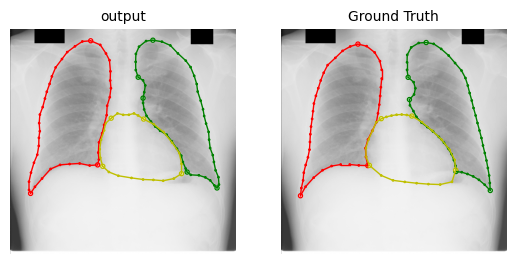

In [260]:
image = train_dataset[69]['image']
lm = train_features[69]
draw = data.cpu().numpy()[0,0,:,:]

ax = plt.subplot(1, 2, 1)
drawOrgans(ax, outputs[69] * 1024, None, draw.copy())
plt.title('output', fontsize=10)
plt.axis('off')

ax = plt.subplot(1, 2, 2)
drawOrgans(ax, lm * 1024, None, draw.copy())
plt.title('Ground Truth', fontsize=10)
plt.axis('off')

In [261]:
test_output = []
for i in range(15):
    with torch.no_grad():
        data = test_dataset[i]['image'] 
        data = torch.unsqueeze(data, 0).to(device)
        output = double65(data)
        if len(output) > 1:
            output = output[0]
        output = output.cpu().numpy().reshape(-1) 
        output = np.clip(output, 0, 1)[:240]
        test_output.append(output)

In [265]:
val_output = []
for i in range(15):
    with torch.no_grad():
        data = val_dataset[i]['image'] 
        data = torch.unsqueeze(data, 0).to(device)
        output = double65(data)
        if len(output) > 1:
            output = output[0]
        output = output.cpu().numpy().reshape(-1)
        output = np.clip(output, 0, 1)[:240]
        val_output.append(output)
        

In [266]:
from sklearn.linear_model import LinearRegression

reg_out = LinearRegression().fit(outputs, train_CTR)

In [269]:
out_pred = reg_out.predict(test_output)
test_pred = reg_out.predict(X_test)
val_pred = reg_out.predict(val_output)

r2_out = r2_score(test_CTR, out_pred)
print('R2:', r2_out)

r2_test = r2_score(test_CTR, test_pred)
print('R2:', r2_test)

r2_val = r2_score(val_CTR, val_pred)
print('R2:', r2_val)



R2: -0.4932138141440925
R2: 0.5872668197972643
R2: 0.5986458123436926


In [272]:
print(val_pred)
print("\n")
print(val_CTR)

[0.5709509  0.51564354 0.50986284 0.5725674  0.36416    0.47179598
 0.4240703  0.56507677 0.4807338  0.43035    0.4766404  0.4925844
 0.44159955 0.5440828  0.520616  ]


tensor([0.5482, 0.5431, 0.5506, 0.5480, 0.4061, 0.5381, 0.4644, 0.5871, 0.4797,
        0.4537, 0.4837, 0.4626, 0.4478, 0.5418, 0.4812])


(-0.5, 1023.5, 1023.5, -0.5)

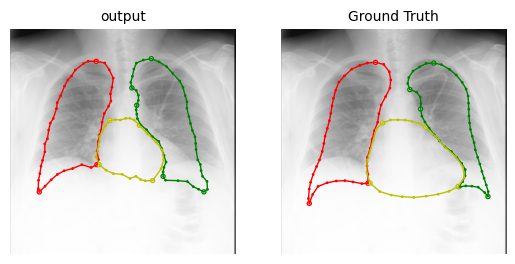

In [274]:
image = val_dataset[1]['image']
lm = val_features[1]
draw = data.cpu().numpy()[0,0,:,:]

ax = plt.subplot(1, 2, 1)
drawOrgans(ax, val_output[4] * 1024, None, draw.copy())
plt.title('output', fontsize=10)
plt.axis('off')

ax = plt.subplot(1, 2, 2)
drawOrgans(ax, lm * 1024, None, draw.copy())
plt.title('Ground Truth', fontsize=10)
plt.axis('off')